In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Analysis imports
from pandas.plotting import lag_plot
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame
from pandas import concat

In [3]:
import pathlib
import os

In [9]:
dir_path = pathlib.Path.cwd().parent
folder_path = dir_path / "data" / "bitcoin"
file_name = "BTC-Daily.csv"
df= pd.read_csv(os.path.join(folder_path, file_name),parse_dates=['date'],index_col='date')
print(df)

                  unix   symbol      open      high       low     close  \
date                                                                      
2022-03-01  1646092800  BTC/USD  43221.71  43626.49  43185.48  43185.48   
2022-02-28  1646006400  BTC/USD  37717.10  44256.08  37468.99  43178.98   
2022-02-27  1645920000  BTC/USD  39146.66  39886.92  37015.74  37712.68   
2022-02-26  1645833600  BTC/USD  39242.64  40330.99  38600.00  39146.66   
2022-02-25  1645747200  BTC/USD  38360.93  39727.97  38027.61  39231.64   
...                ...      ...       ...       ...       ...       ...   
2014-12-02  1417478400  BTC/USD    378.39    382.86    375.23    379.25   
2014-12-01  1417392000  BTC/USD    376.40    382.31    373.03    378.39   
2014-11-30  1417305600  BTC/USD    376.57    381.99    373.32    373.34   
2014-11-29  1417219200  BTC/USD    376.42    386.60    372.25    376.72   
2014-11-28  1417132800  BTC/USD    363.59    381.34    360.57    376.28   

              Volume BTC

In [10]:
df = df.loc[ :'2021-01-01']
df

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2022-03-01,1646092800,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
2022-02-28,1646006400,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2022-02-27,1645920000,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
2022-02-26,1645833600,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
2022-02-25,1645747200,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07
...,...,...,...,...,...,...,...,...
2021-01-05,1609804800,BTC/USD,32054.23,34500.00,29936.26,34039.05,14806.496507,5.039991e+08
2021-01-04,1609718400,BTC/USD,33068.83,33669.76,27734.00,32005.88,22446.940005,7.184341e+08
2021-01-03,1609632000,BTC/USD,32216.51,34800.00,31977.45,33097.83,14160.581280,4.686845e+08


In [6]:
import seaborn as sns

In [17]:
# Understanding the data for time based train-test split
print(f'Start Date: {df.index.min()}')
print(f'End Date: {df.index.max()}')
print(f'Total Days: {len(df)}')

Start Date: 2021-01-01 00:00:00
End Date: 2022-03-01 00:00:00
Total Days: 425


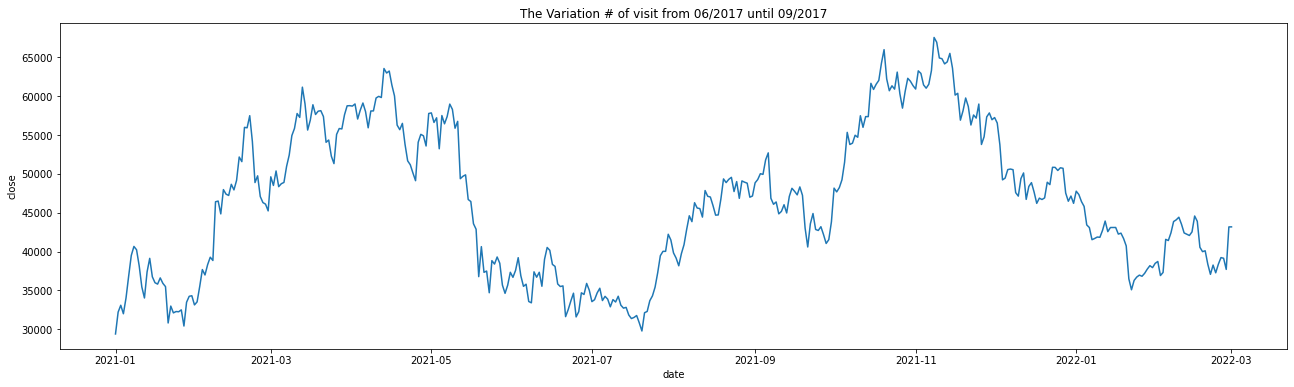

In [11]:
plt.figure(figsize=(22,6))
sns.lineplot(x=df.index, y=df['close'])
plt.title('The Variation # of visit from 06/2017 until 09/2017')
plt.show()

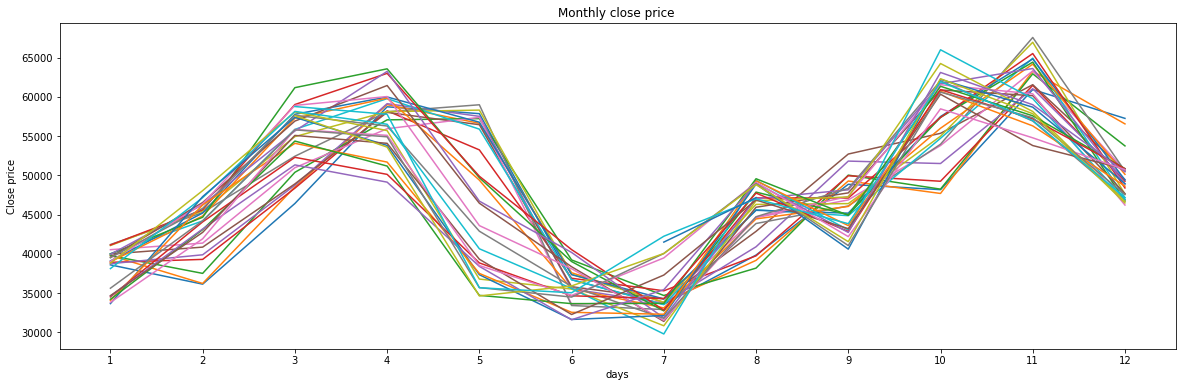

In [42]:
# i'm going to create a pivot table to plot the monthly temperatures through the years
dc['day'] = dc.index.day
dc['month'] = dc.index.month
pivot = pd.pivot_table(df, values='close', index='month', columns='day', aggfunc='mean')
pivot.plot(figsize=(20,6))
plt.title('Monthly close price ')
plt.xlabel('days')
plt.ylabel('Close price')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()

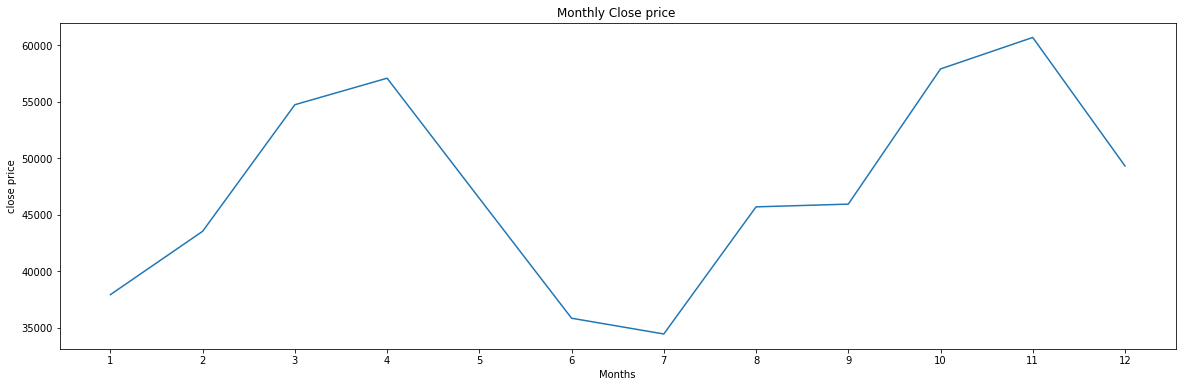

In [43]:
monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Monthly Close price ')
plt.xlabel('Months')
plt.ylabel('close price')
plt.xticks([x for x in range(1,13)])
plt.show()

In [40]:
dm=df.reset_index(drop=True)
dc=dm[['date','close']].set_index(keys='date')
dc


,close
date,
2022-03-01,43185.48
2022-02-28,43178.98
2022-02-27,37712.68
2022-02-26,39146.66
2022-02-25,39231.64
...,...
2021-01-05,34039.05
2021-01-04,32005.88
2021-01-03,33097.83


In [44]:
year_avg = pd.pivot_table(dc, values='close', index='month', aggfunc='mean')
year_avg['03 Months MA'] = year_avg['close'].rolling(3).mean()
year_avg[['close','03 Months MA']].plot(figsize=(20,6))
plt.title('Monthly AVG Close price')
plt.xlabel('Months')
plt.ylabel('Temperature')
#plt.xticks([x for x in range(1900,2012,3)])
plt.show()

KeyError: 'month'

Shape: Train=(365, 1), Validation=(60, 1)


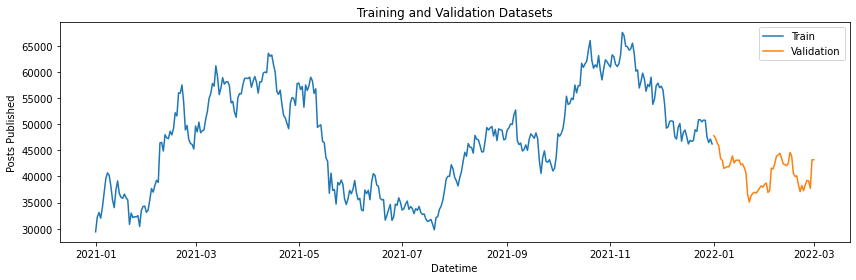

In [86]:
# Time based train-test splitting
train = dc.loc['2021-12-31':]
valid = dc.loc[:'2022-01-01']

print(f'Shape: Train={train.shape}, Validation={valid.shape}')

# Plotting the training and validation datasets
plt.figure(figsize=(12, 4))
plt.plot(train, label='Train')
plt.plot(valid, label='Validation')
plt.xlabel('Datetime')
plt.ylabel('Posts Published')
plt.title('Training and Validation Datasets')
plt.legend()
plt.tight_layout()
plt.show()

In [87]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Statistics
import statsmodels.api as sm
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from pmdarima import auto_arima
from prophet import Prophet

# Machine Learning
from sklearn.metrics import mean_squared_error

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Loggers
import logging
logging.getLogger().setLevel(logging.ERROR)

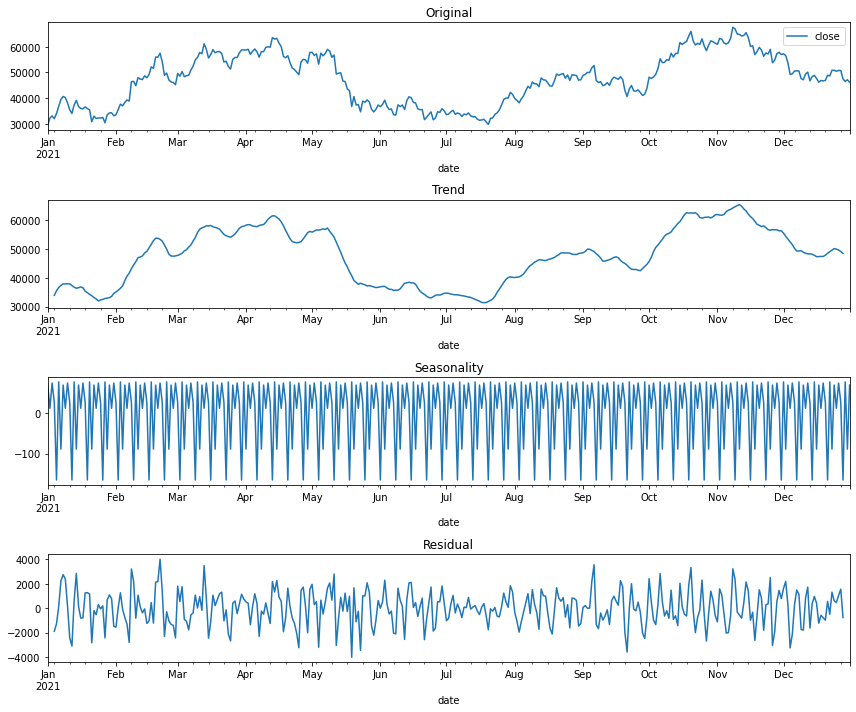

In [88]:
# Visualizing the components of our time series: Trend, Seasonality, and Noise
decomposition = sm.tsa.seasonal_decompose(train)

# Plotting the components
fig, axes = plt.subplots(4, 1, figsize=(12, 10))
train.plot(title='Original', ax=axes[0])
decomposition.trend.plot(title='Trend', ax=axes[1])
decomposition.seasonal.plot(title='Seasonality', ax=axes[2])
decomposition.resid.plot(title='Residual', ax=axes[3])
plt.tight_layout()
plt.show()

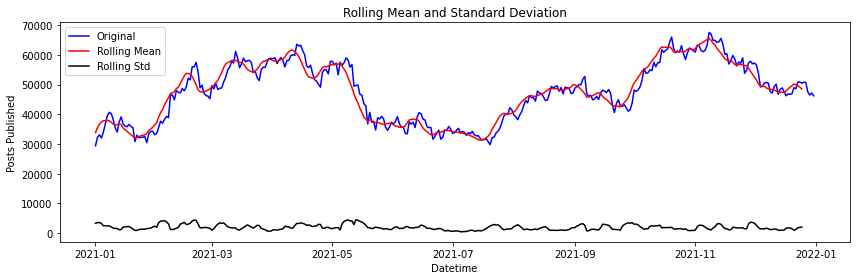

Results of Dickey-Fuller Test:
Test Statistic                  -1.440923
P-Value                          0.562508
#Lags Used                       0.000000
Number of Observations Used    364.000000
Critical Value (1%)             -3.448443
Critical Value (5%)             -2.869513
Critical Value (10%)            -2.571018
dtype: float64


In [89]:
# Creating a function to check stationarity of the given data
def check_stationarity(data):
    # Determining rolling statistics
    rol_mean = data.rolling(7).mean() #7 days in a week
    rol_std = data.rolling(7).std()
    
    # Plotting rolling statistics
    plt.figure(figsize=(12, 4))
    plt.plot(data, color='blue', label='Original')
    plt.plot(rol_mean, color='red', label='Rolling Mean')
    plt.plot(rol_std, color='black', label='Rolling Std')
    plt.xlabel('Datetime')
    plt.ylabel('Posts Published')
    plt.title('Rolling Mean and Standard Deviation')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Performing Dickey-Fuller test
    results = adfuller(data)
    df_output = pd.Series(results[:4], index=['Test Statistic', 'P-Value', '#Lags Used', 'Number of Observations Used'])
    for key, value in results[4].items():
        df_output[f'Critical Value ({key})'] = value
    print(f'Results of Dickey-Fuller Test:\n{df_output}')
    
# Stationarity check of our daily time series
check_stationarity(train)

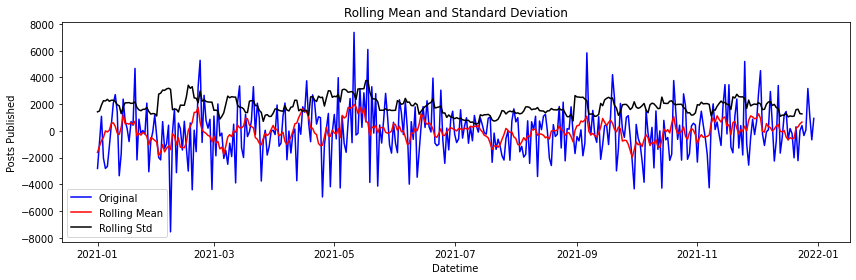

Results of Dickey-Fuller Test:
Test Statistic                 -20.029605
P-Value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    363.000000
Critical Value (1%)             -3.448494
Critical Value (5%)             -2.869535
Critical Value (10%)            -2.571029
dtype: float64


In [163]:
# First Differencing of boxcox-transformed time series
train_tfm_diff = train - train.shift(1)
train_tfm_diff.dropna(inplace=True)
check_stationarity(train_tfm_diff)

In [159]:
# Auto-ARIMA on boxcox-transformed training time series without seasonality
arima = auto_arima(train, d=1, seasonal=False)
print(arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3270.544
Date:                Sat, 25 Feb 2023   AIC                           6543.088
Time:                        15:47:00   BIC                           6546.986
Sample:                             0   HQIC                          6544.637
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.721e+06   2.17e+05     17.130      0.000    3.29e+06    4.15e+06
Ljung-Box (L1) (Q):                   1.11   Jarque-Bera (JB):                23.79
Prob(Q):                              0.29   Pr

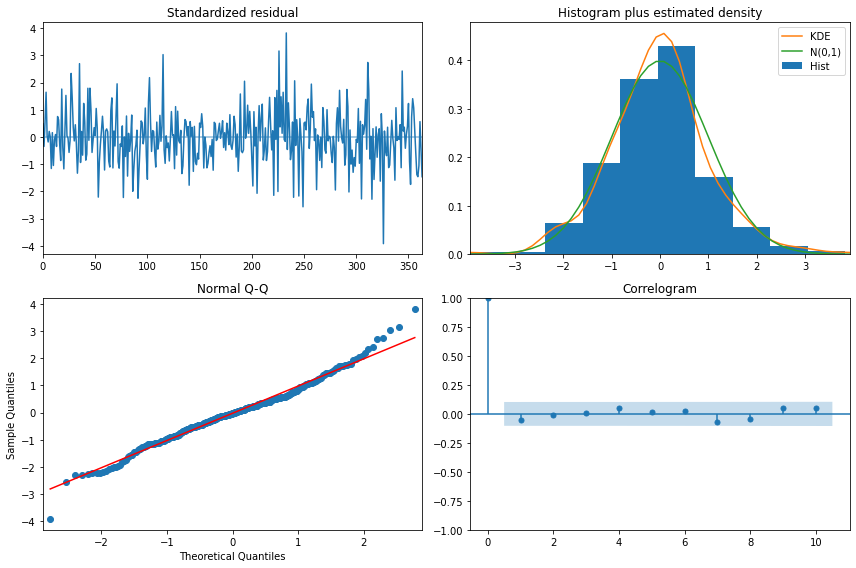

In [160]:
# Residual Plots
arima.plot_diagnostics(figsize=(12,8))
plt.tight_layout()
plt.show()

In [153]:
# Creating a function to plot the results of the forecast
def plot_forecast(forecast, model, rmse):
    plt.figure(figsize=(12,4))
    plt.plot(train, label='Training')
    plt.plot(valid, label='Actual')
    plt.plot(forecast, label='Forecast')
    plt.xlabel('Datetime')
    plt.ylabel('Posts Published')
    plt.title(f'{model} (RMSE: {round(rmse, 2)})')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [154]:
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults

In [260]:
resDiff = sm.tsa.arma_order_select_ic(train['close'], max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q) = (4, 3) is the best.


In [326]:
model = sm.tsa.statespace.SARIMAX(train, order=(4,1,3),dynamic=False, seasonal_order=(0,0,0,12), trend='c')
result = model.fit(disp=-1) 

In [324]:
forecast = result.predict(0,end).to_frame(name="forecast")
forecast
#forecast = inv_boxcox(forecast, lam)
forecast["date"]=valid.index

forecast = forecast.set_index('date')
arima_rmse = mean_squared_error(valid, forecast, squared=False)
plot_forecast(forecast, 'ARIMA Model', arima_rmse)

In [288]:
forecast = result.forecast(60).to_frame(name="forecast")
forecast
#forecast = inv_boxcox(forecast, lam)
forecast["date"]=valid.index

forecast = forecast.set_index('date')
arima_rmse = mean_squared_error(valid, forecast, squared=False)
plot_forecast(forecast, 'ARIMA Model', arima_rmse)

In [301]:
# Generate predictions and with , dynamic=True
one_step_forecast = result.get_prediction(start=-365)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

In [302]:
mean_forecast

date
2021-12-31        0.000000
2021-12-30    45751.434329
2021-12-29    47318.010450
2021-12-28    46518.024743
2021-12-27    48019.066210
                  ...     
2021-01-05    36884.247298
2021-01-04    34217.772823
2021-01-03    32127.681821
2021-01-02    33057.878643
2021-01-01    32064.024174
Name: predicted_mean, Length: 365, dtype: float64

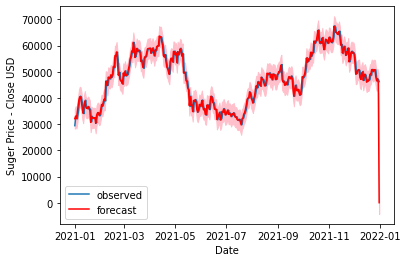

In [293]:
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

plt.plot(train.index, train, label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
         upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Suger Price - Close USD')
plt.legend()
plt.show()

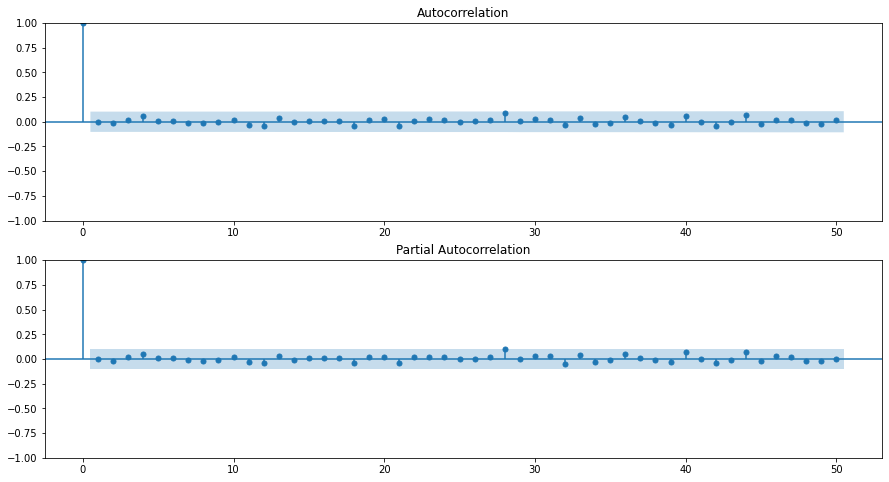

In [272]:
res = result.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [283]:
# use auto arima to determine the best order on this dataset
stepwise_fit = auto_arima(train,error_action='ignore',seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.41 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6544.879, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=6546.958, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=6547.075, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=6543.088, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=6545.076, Time=0.09 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=6545.191, Time=0.07 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=6546.854, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=6546.732, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=6546.732, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=6548.726, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12]          
Total fit time: 2.256 seconds


In [304]:
# Generate predictions and with , dynamic=True
one_step_forecast = result.forecast(step=60)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean
mean_forecast
mean_forecast["date"]=valid.index

mean_forecast = mean_forecast.set_index('date')
# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

AttributeError: 'Series' object has no attribute 'predicted_mean'

In [305]:
one_step_forecast

365    29283.642333
dtype: float64

In [ ]:
forecast = result.forecast(60).to_frame(name="forecast")
forecast
#forecast = inv_boxcox(forecast, lam)
forecast["date"]=valid.index

forecast = forecast.set_index('date')

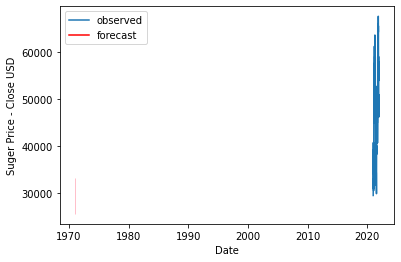

In [296]:
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower close']
upper_limits = confidence_intervals.loc[:,'upper close']

plt.plot(valid.index, valid, label='observed')

# plot your mean forecast
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
         upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Suger Price - Close USD')
plt.legend()
plt.show()